# Teil 1: Grundlagen der Clusteranalyse (Sample Size = 7)
:
# a. Erstellen Sie die paarweise Distanzmatrix über die Datenpunkte. Das Distanzmaß ist der
# euklidische Abstand.

In [1]:
#import numpy
#from sklearn.metrics import DistanceMetric

#dist = DistanceMetric.get_metric('euclidean')
#data = numpy.array([[1, 7], [0, 9], [12, 12], [8, 8], [6, 10], [3, 4], [9, 10]])
#print("Distanzmatrix:")
#dist.pairwise(data)

import numpy as numpy
from sklearn.metrics.pairwise import pairwise_distances
import pandas as pd
data = pd.DataFrame({"x": [1,0,12,8,6,3,9],"y": [7,9,12,8,10,4,10] }, columns=["x", "y"])
dist = numpy.round(pairwise_distances(data, metric="euclidean"))
dist

array([[ 0.,  2., 12.,  7.,  6.,  4.,  9.],
       [ 2.,  0., 12.,  8.,  6.,  6.,  9.],
       [12., 12.,  0.,  6.,  6., 12.,  4.],
       [ 7.,  8.,  6.,  0.,  3.,  6.,  2.],
       [ 6.,  6.,  6.,  3.,  0.,  7.,  3.],
       [ 4.,  6., 12.,  6.,  7.,  0.,  8.],
       [ 9.,  9.,  4.,  2.,  3.,  8.,  0.]])

# b. Führen Sie ein agglomeratives Clustering mit Single Linkage, Complete Linkage und Centroid
# Linkage durch und erstellen Sie jeweils das vollständige Dendogram. Vergleichen Sie die
# Unterschiede bei der Clusterbildung. Welches ist für Sie die optimale Anzahl an Clustern?
# Begründen Sie Ihre Antwort.

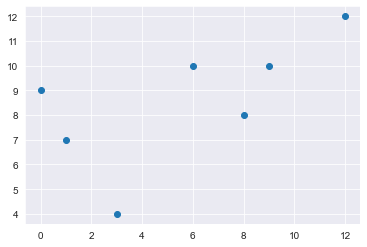

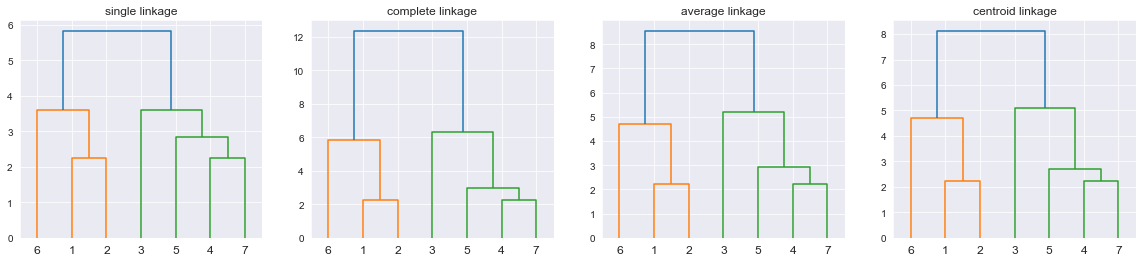

In [2]:
import matplotlib.pyplot as pl
%matplotlib inline

from scipy.cluster.hierarchy import dendrogram, linkage

pl.scatter([1,0,12,8,6,3,9],[7,9,12,8,10,4,10])
linkage_methods = ["single", "complete", "average", "centroid"]

f, axs = pl.subplots(ncols=4, figsize=(20, 4))
for i in range(0, 4):
    res = linkage(data, linkage_methods[i]) # execute agglomerative clustering
    axs[i].set_title(linkage_methods[i] + " linkage")
    dn = dendrogram(res, ax=axs[i], labels=range(1,len(data)+1)) # visualize dendrogram

Unserer Meinung nach sind 2 Cluster für diesen Datensatz optimal (Intuitive Entscheidung).
-> Eine Kette und ein Oval

TypeError: __init__() got an unexpected keyword argument 'metric'

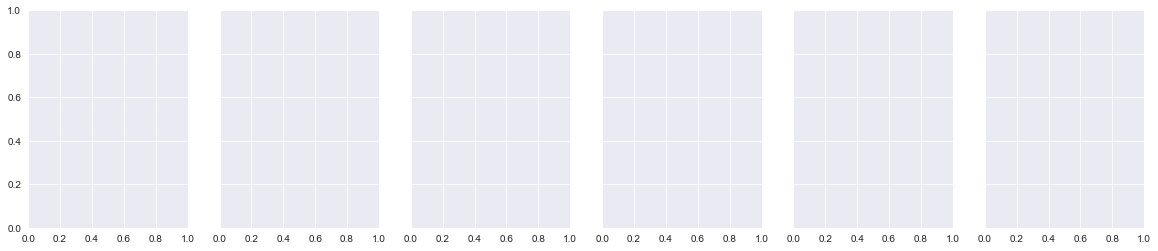

In [3]:
from sklearn.cluster import AgglomerativeClustering
import pandas as pd

def agglomerative_clustering(X, c, linkage):
    ac = AgglomerativeClustering(n_clusters = c, metric = "euclidean", linkage = linkage)
    assignment = ac.fit_predict(X)
    df = pd.concat([pd.DataFrame(X, columns=["x", "y"]), pd.DataFrame({"Cluster": assignment})], axis=1)
    return df

linkage_methods = ["single", "complete", "average"]
for linkage in linkage_methods:
    n = len(data)
    f, axs = pl.subplots(ncols=n-1, figsize=(20, 4), sharey=True)
    for i in range(n, 1, -1):
        df = agglomerative_clustering(data, i, linkage)
        axs[n-i].scatter(df.x, df.y, c=df.Cluster, cmap='Dark2', s=200)
        axs[n-i].set_title(str(i) + " clusters" + f" ({linkage})")

Überraschend clustern die drei Methoden single, complete und average linkage gleich.
Es lassen sich jedoch in den Dendogrammen unterschiedliche Distanzen ablesen, nachdem sie die Datenpunkte clusterten.

# c. Führen Sie ein Clustering mittels DBSCAN durch. Stellen Sie eps und MinPts des DBSCAN so
# ein, dass zwei Cluster entstehen. Welche Punkte sind dann Grenzinstanzen, Kerninstanzen
# und Geräuschinstanzen?

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=4, min_samples=3)
labels = dbscan.fit_predict(data)
print("DBSCAN-Labels:", labels)

core_samples_mask = numpy.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

core_instances = data[core_samples_mask]
border_instances = data[numpy.logical_and(~core_samples_mask, labels != -1)]
noise_instances = data[labels == -1]

print("Kerninstanzen:\n", core_instances)
print("Grenzinstanzen:\n", border_instances)
print("Geräuschinstanzen:", noise_instances)

print(f"Anzahl Cluster: {len(numpy.unique(dbscan.labels_))}")
print(f"Anzahl Kerninstanzen {len(dbscan.components_)}")

# d. Erstellen Sie eine Heatmap (mittels seaborn.heatmap) der Ähnlichkeitsmatrix unter
# Berücksichtigung des ermittelten Clusterings (i.e. ordnen Sie die Punkte mit Bezug zu den
# Clustern) und interpretieren Sie anhand dessen die Güte des Clusterings.

In [ ]:
import seaborn as sns; sns.set_theme()
data2 = pd.DataFrame({"x": [1,0,3,8,6,12,9],"y": [7,9,4,8,10,12,10] }, columns=["x", "y"]) #Neuordnung der Datenpunkte nach Clustern 1 und 2
dist2 = numpy.round(pairwise_distances(data2, metric="euclidean"))
ax = sns.heatmap(dist2)

Hohe Güte, weil die Distanzen innerhalb der Cluster gering und außerhalb der Cluster hoch ist

# Teil 2: Partitionierende Clusteranalyse und Klassifikationsbäume (Sample Size = 1000)

In [ ]:
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
import seaborn as sns
from seaborn import pairplot

X, Y = make_blobs(n_samples=1000, n_features=5, centers=4, cluster_std=3, random_state=5)

data = pd.DataFrame()
data['Merkmal 1'] = X[:, 0]
data['Merkmal 2'] = X[:, 1]
data['Merkmal 3'] = X[:, 2]
data['Merkmal 4'] = X[:, 3]
data['Merkmal 5'] = X[:, 4]
data['Klasse'] = Y

pairplot(data, hue="Klasse")

# - Partitionierendes Clustering -

# k-Means Clustering

In [ ]:
from sklearn.cluster import KMeans
#k-Means Clustering für k = 4
kmeans = KMeans(n_clusters=4, random_state=5, n_init='auto')
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [ ]:
# Heatmap der Konfusionsmatrix und Genauigkeit des Clusterings
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score

cm = confusion_matrix(Y, y_kmeans)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
plt.xlabel('Vorhergesagtes Cluster')
plt.ylabel('Wahre Clusternummer')
plt.show()
print(f"Genauigkeit: {accuracy_score(Y, y_kmeans)}")

Interpretation:
Accuracy von 0.007 passt zur Konfusionsmatrix. Es werden nämlich zum größten Teil die falschen Cluster vorhergesagt.
Wäre das Clustering gut, sähe man eine Diagonale beginnend von oben links.
Die schlechten Vorhersagen könnten daran liegen, dass Clustering überlicherweise ein
unüberwachtes Lernen ist, hier aber mit den wahren Klassennummern verglichen wird.

# - Klassifikationsbaum -

In [ ]:
#Einteilen in 80% Trainingsdaten und 20% Testdaten
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=5, test_size=0.2, train_size=0.8)

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
plt.figure(figsize=(10.0, 10.0))
clf = DecisionTreeClassifier(criterion="gini", random_state=5, min_impurity_decrease=0.05)
clf = clf.fit(X_train, y_train)
plot_tree(clf, filled=True)

Interpretation:
In unserem Datensatz gibt es vier Klassen. Jedes Element hat fünf Merkmale. Insgesamt gibt es 800 Elemente. Es gibt jeweils fast 200 Elemente pro Klasse.
Als Erstes wird entschieden, ob das Merkmale x[3] <= 0.193 ist. Wenn nicht, dann wird nach links gegangen und geprüft, ob das Merkmal x[4] <= -0.785. Wenn das nicht der Fall ist, dann wird das Element in das grüne Blatt eingeordnet, sonst in das hellblaue. Falls x[3] > 0.193 ist, wird in den braunen Ast gegangen und geprüft, on x[1] <= 2.584. Wenn das nicht der Fall ist, dann wird das Element in den rosa Blatt eingeordnet, sonst in den orangen.

In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score

pred = clf.predict(X_test)
c_matrix = confusion_matrix(y_true=y_test, y_pred=pred)
sns.heatmap(c_matrix, annot=True, fmt="0.0f")
plt.xlabel("Vorhergesagte Klasse")
plt.ylabel("Wahre Klasse")
print(f"Genauigkeit: {accuracy_score(y_true=y_test, y_pred=pred)}")

Beobachtung:
Guter Klassifikationsbaum, da die wahren Klassen sehr konsistent auch vorhergesagt werden.
-> Diagonale in der Konfusionsmatrix

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

min_samples_leaf_values = [200, 100, 50, 25, 12, 6, 2]
accuracy_scores_test = []
accuracy_scores_train = []

for min_samples_leaf in min_samples_leaf_values:
    decision_tree_clf = DecisionTreeClassifier(criterion="gini", min_impurity_decrease=0.05, min_samples_leaf=min_samples_leaf)
    decision_tree_clf.fit(X_train, y_train)

    y_predict_test = decision_tree_clf.predict(X_test)
    y_predict_train = decision_tree_clf.predict(X_train)

    accuracy_scores_test.append(accuracy_score(y_test, y_predict_test))
    accuracy_scores_train.append(accuracy_score(y_train, y_predict_train))

sns.set(rc={"figure.figsize":(15, 6)})
sns.set(font_scale=1.4)
line_plot = sns.lineplot(x=min_samples_leaf_values, y=accuracy_scores_test)
line_plot = sns.lineplot(x=min_samples_leaf_values, y=accuracy_scores_train)
plt.legend(labels=["accuracy train","accuracy test"])
line_plot.set(xlabel = "min samples leaf", ylabel = "accuracy")


Die x-Achse zeigt verschiedene Werte von min_samples_leaf, während die y-Achse die Vorhersagegenauigkeit darstellt. Es gibt zwei Linien im Diagramm: Trainings- und Testgenauigkeit.

Man kann erkennen, dass kein Overfitting stattfindet, da die Trainingsgenauigkeit ("accuracy train") fast genauso hoch ist wie die Testgenauigkeit ("accuracy test") und trotz zunehmender Samples die beiden Linien keinen großen Abstand aufweisen.

# - Random-Forest-Klassifikator -

In [1]:
#Training eines Random-Forest-Klassifikators (20 Bäume)
from sklearn.ensemble import RandomForestClassifier

random_forest_clf = RandomForestClassifier(n_estimators=20, random_state=5)
random_forest_clf = random_forest_clf.fit(X_train, y_train)
y_pred_random_forest = random_forest_clf.predict(X_test)

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
#Konfusionsmatrix
c_matrix_rf = confusion_matrix(y_true=y_test, y_pred=y_pred_random_forest)
sns.heatmap(c_matrix_rf, annot=True, fmt="0.0f")
plt.xlabel("Vorhergesagte Klasse")
plt.ylabel("Wahre Klasse")
print(f"Genauigkeit: {accuracy_score(y_test, y_pred_random_forest)}")

Der Random Forest ist genauer, als das k-means - Verfahren aus der vorherigen Aufgabe, weil es ein Ensemble-Modell ist und nicht ein Clustering-Algorithmus, wie das k-means - Verfahren. Somit ist es robuster gegenüber Rauschen und Overfitting.

Er ist auch genauer als der alleinige Entscheidungsbaum, da er die Vorhersagen von mehreren Bäumen kombiniert. Durch die Stärken von anderen Bäumen können die Schwächen eines einzelnen Baumes ausgeglichen werden.

In [ ]:
#Bericht der Klassifikation
from sklearn.metrics import classification_report
print(classification_report(y_true=y_test, y_pred=y_pred_random_forest))


Precision: Anteil der korrekt vorhergesagten positiven Instanzen unter allen vorhergesagten positiven Instanzen.
Recall: Anteil der korrekt vorhergesagten positiven Instanzen unter allen tatsächlich positiven Instanzen.
F1-Score: Einzelne Metrik, die Precision und Recall kombiniert, um die Klassifikationsleistung zu bewerten.
Support: Anzahl der Instanzen in jeder Klasse im Testdatensatz.
Accuracy: Anzahl der richtig klassifizierten Datenpunkten
macro avg: Durchschnittliche Metrik über alle Klassen, wobei jede Klasse gleich gewichtet wird.
weighted avg: Durchschnittliche Metrik über alle Klassen, wobei jede Klasse proportional zu ihrem Support gewichtet wird.